In [ ]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 4.4 MB 28.9 MB/s 
     |████████████████████████████████| 1.2 MB 48.7 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
     |████████████████████████████████| 596 kB 73.2 MB/s 
     |████████████████████████████████| 6.6 MB 32.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=702e0bb08de5c2e9adeedc95bda834072c3563b4fb1d3960014879c5319d211f
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd

In [ ]:
data_df = pd.read_csv('tweets1.csv')
data_df.head()

,label,content
0,Negative,Fizzling out like slow puncture after launchi...
1,Positive,"People only focus on the smoking part, but i..."
2,Negative,Mnadanganywa Mchana... At least someone has ...
3,Positive,Biden ameita Supreme Court WAKORA...Kenya sets...
4,Positive,I still say WAJACKOYAH tosha kama kuna wakuni...


In [ ]:
import time

import torch
from sentence_transformers import SentenceTransformer
from torch import nn, optim, tensor
from torch.nn import functional as F
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:

class Classifier(nn.Module):
    def __init__(self, embedding_dim, num_labels, dropout):
        super(Classifier, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_labels = num_labels
        self.dropout = dropout

        self.dp = nn.Dropout(self.dropout)
        self.ff = nn.Linear(self.embedding_dim, self.num_labels)

    def forward(self, input_embeddings):
        tensor = self.dp(input_embeddings)
        tensor = self.ff(tensor)
        return tensor, F.softmax(tensor, dim=-1)

In [ ]:
# Removing empty rows
data_df.dropna(inplace=True)
#Dropping Duplicates
data_df.drop_duplicates(inplace=True)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data_df.label)
data_df["label"] = le.transform(data_df.label)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df.content,data_df.label, test_size=0.2, random_state=42)

In [ ]:
X_train.describe()

count                             705
unique                            704
top       TIFA poll: Raila leads Ruto
freq                                2
Name: content, dtype: object

In [ ]:
X_test.describe()

count                    177
unique                   177
top       This is immaturity
freq                       1
Name: content, dtype: object

In [ ]:
data_df.head()

,label,content
0,0,Fizzling out like slow puncture after launchi...
1,2,"People only focus on the smoking part, but i..."
2,0,Mnadanganywa Mchana... At least someone has ...
3,2,Biden ameita Supreme Court WAKORA...Kenya sets...
4,2,I still say WAJACKOYAH tosha kama kuna wakuni...


In [ ]:
sentences = X_train.tolist()
test_sentences = X_test.tolist()

In [ ]:
labels = torch.tensor(y_train.tolist())
test_labels = torch.tensor(y_test.tolist())

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams


In [ ]:

# encoder = SentenceTransformer('distilbert-base-nli-mean-tokens')
encoder = SentenceTransformer('quora-distilbert-multilingual')
print('Encoding segments...')
start = time.time()
embedding = encoder.encode(sentences, convert_to_tensor=True)
test_sentences_embedding = encoder.encode(test_sentences, convert_to_tensor=True)
print(f"Encoding completed in {time.time() - start} seconds.")


Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/447 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Encoding segments...
Encoding completed in 56.34493041038513 seconds.


In [ ]:
embedding

tensor([[ 2.4774e-01,  1.6824e-02,  1.0522e-01,  ...,  2.5956e-03,
          1.4415e-01, -1.4544e-02],
        [-4.4549e-02, -1.1626e-01,  1.4054e-01,  ..., -1.3816e-01,
          9.9975e-02, -2.7430e-01],
        [-1.7800e-02, -1.7399e-01,  2.0813e-01,  ..., -1.1777e-01,
          3.5379e-01, -6.8751e-02],
        ...,
        [ 1.6718e-01,  8.1864e-02, -3.3288e-02,  ..., -1.2656e-01,
          1.1324e-01, -1.1721e-01],
        [ 4.3932e-05,  1.4402e-01,  2.5133e-01,  ..., -4.1463e-02,
          2.8072e-01, -6.2008e-02],
        [ 1.3670e-01,  1.9839e-01,  7.4986e-02,  ...,  2.3269e-02,
          1.2860e-01,  1.8503e-01]])

In [ ]:
class Batcher(object):
  def __init__(self, data_x, data_y, batch_size):
    self.data_x = data_x
    self.data_y = data_y
    self.batch_size = batch_size
    self.n_samples  = data_x.shape[0]
    self.indices = torch.randperm(self.n_samples)
    self.ptr = 0

In [ ]:
def __iter__(self):
  return self


In [ ]:
def __next__(self):
  if self.ptr > self.n_samples:
    self.indices = torch.randperm(self.n_samples)
    raise StopIteration
  else:
    batch_indices = self.indices[self.ptr:self.ptr+self.batch_size]
    self.ptr += self.batch_size
    return self.data_x[batch_indices], self.data_y[batch_indices]

In [ ]:
embedding

tensor([[ 2.4774e-01,  1.6824e-02,  1.0522e-01,  ...,  2.5956e-03,
          1.4415e-01, -1.4544e-02],
        [-4.4549e-02, -1.1626e-01,  1.4054e-01,  ..., -1.3816e-01,
          9.9975e-02, -2.7430e-01],
        [-1.7800e-02, -1.7399e-01,  2.0813e-01,  ..., -1.1777e-01,
          3.5379e-01, -6.8751e-02],
        ...,
        [ 1.6718e-01,  8.1864e-02, -3.3288e-02,  ..., -1.2656e-01,
          1.1324e-01, -1.1721e-01],
        [ 4.3932e-05,  1.4402e-01,  2.5133e-01,  ..., -4.1463e-02,
          2.8072e-01, -6.2008e-02],
        [ 1.3670e-01,  1.9839e-01,  7.4986e-02,  ...,  2.3269e-02,
          1.2860e-01,  1.8503e-01]])

In [ ]:
train_batcher = Batcher(embedding, labels, batch_size=16)

In [ ]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier

import re, string, random

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

if __name__ == "__main__":

    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    text = twitter_samples.strings('tweets.20150430-223406.json')
    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

    stop_words = stopwords.words('english')

    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]

    dataset = positive_dataset + negative_dataset

    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

    classifier = NaiveBayesClassifier.train(train_data)

    print("Accuracy is:", classify.accuracy(classifier, test_data))

    print(classifier.show_most_informative_features(10))

    custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

    custom_tokens = remove_noise(word_tokenize(custom_tweet))

    print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]
Accuracy is: 0.9956666666666667
Most Informative Features
                      :) = True           Positi : Negati =   1630.1 : 1.0
                follower = True           Positi : Negati =     39.8 : 1.0
                     sad = True           Negati : Positi =     32.6 : 1.0
                     bam = True           Positi : Negati =     19.4 : 1.0
                     x15 = True           Negati : Positi =     17.9 : 1.0
               community = True           Positi : Negati =     17.4 : 1.0
                    glad = True           Positi : Negati =     13.2 : 1.0
                    damn = True           Negati : Positi =     13.2 : 1.0
                 welcome = True           Positi : Negati =     12.8 : 1.0
                   didnt = True           Negati : Positi =     11.8 : 1.0
None
I ordered just once from TerribleCo, 

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Testing the data on 400,000 tweets

In [ ]:
from textblob import TextBlob
rao = pd.read_csv("raila.csv")
rut = pd.read_csv("ruto.csv")
waja = pd.read_csv("waja.csv")
mwa = pd.read_csv("mwaure.csv")

In [ ]:
Raila_reviews = pd.DataFrame(rao[['id', 'content']])
Ruto_reviews = pd.DataFrame(rut[['id', 'content']])
Waja_reviews = pd.DataFrame(waja[['id', 'content']])
Mwaure_reviews = pd.DataFrame(mwa[['id', 'content']])

In [ ]:
Waja_reviews

,id,content,Sentiment_Polarity,Expression Label
0,1547007261297582084,BEST https://t.co/qNo9FEGv8x,1.000000,positive
1,1547007067063451651,@Hon_wajackoyah_ Fizzling out like slow punctu...,-0.300000,negative
3,1547002039397482496,@AfricaCheck_KE @Hon_wajackoyah_ Mnadanganywa ...,-0.300000,negative
4,1546996898636206081,Biden ameita Supreme Court WAKORA...Kenya sets...,0.178571,positive
11,1546970446452883457,GEORGE WAJACKOYAH sets the record straight on ...,0.250000,positive
...,...,...,...,...
76301,1521130133939232768,"In other words, every county has produced a Pr...",-0.062500,negative
76302,1521078787508690946,@NG_tha_One There are only 2 choices cabron. R...,-0.044444,negative
76305,1521067036549521410,@OleItumbi @KenyaEditors Professor George waja...,0.400000,positive
76313,1520848923606360065,@dawn_ochieng @HillaryNgasura @AtwoliDza 🤣once...,-0.500000,negative


In [ ]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Ruto_reviews['Sentiment_Polarity'] = Ruto_reviews['content'].apply(find_pol)
Ruto_reviews.tail()

Ruto_reviews['Expression Label'] = np.where(Ruto_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Ruto_reviews['Expression Label'][Ruto_reviews.Sentiment_Polarity ==0] = "Neutral"
Ruto_reviews.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,content,Sentiment_Polarity,Expression Label
99995,1543720811332354054,@WMMartha Uhuru being a coward became shy of R...,-0.19375,negative
99996,1543720782974529540,@nyannyan22202 おー！単発神引き！！,0.00000,Neutral
99997,1543720636899807232,@Omwandez_Kevin @TeresahAtieno @kipmurkomen @J...,-0.31250,negative
99998,1543720588652560392,@abdyhassan96 The war is between Ruto and Waja...,0.00000,Neutral
99999,1543720430938116096,@Ruto__spn ありがとうございます！,0.00000,Neutral


In [ ]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity


Raila_reviews['Expression Label'] = np.where(Raila_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Raila_reviews['Expression Label'][Raila_reviews.Sentiment_Polarity ==0] = "Neutral"
Raila_reviews.tail()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,content,Sentiment_Polarity,Expression Label
99993,1538621212280115200,@HonMoses_Kuria is very resourceful to Kenya k...,0.176000,positive
99995,1538620968771403778,It is difficult to believe that it will be a R...,0.025000,positive
99997,1538620967290916866,The Kenya kwanza chief hustler Dr.William Samo...,0.450000,positive
99998,1538620841591709698,@moseskuriahon Since u left hospital and held ...,0.166667,positive
99999,1538620806233739264,@MaaSoldier @hellenjeriKe @DonaldBKipkorir Rai...,0.350000,positive


In [ ]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Waja_reviews['Expression Label'] = np.where(Waja_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Waja_reviews['Expression Label'][Waja_reviews.Sentiment_Polarity ==0] = "Neutral"
Waja_reviews.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,content,Sentiment_Polarity,Expression Label
76301,1521130133939232768,"In other words, every county has produced a Pr...",-0.062500,negative
76302,1521078787508690946,@NG_tha_One There are only 2 choices cabron. R...,-0.044444,negative
76305,1521067036549521410,@OleItumbi @KenyaEditors Professor George waja...,0.400000,positive
76313,1520848923606360065,@dawn_ochieng @HillaryNgasura @AtwoliDza 🤣once...,-0.500000,negative
76314,1520843659985489922,"Justina Wamae, Runningmate to Professor George...",0.068182,positive


In [ ]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Mwaure_reviews['Expression Label'] = np.where(Mwaure_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Mwaure_reviews['Expression Label'][Mwaure_reviews.Sentiment_Polarity ==0] = "Neutral"
Mwaure_reviews.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,content,Sentiment_Polarity,Expression Label
655,1533357647118090242,So far IEBC has cleared four presidential cand...,0.100000,positive
661,1533016931665694720,"Ndio nimetoka kusoma ""how to qualify as a pres...",0.083333,positive
677,1528457756809777155,"@Dmwaurewaihiga The real deal, the real change...",0.200000,positive
678,1524450918871281664,''The Evangelical Alliance of Kenya @EAK_Kenya...,0.125000,positive
680,1523403331070164992,@WehliyeMohamed @ahmednasirlaw GM being the un...,0.375000,positive


In [ ]:
new1 = Ruto_reviews.groupby('Expression Label').count()

In [ ]:
x = list(new1['Sentiment_Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

In [ ]:
df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

reviews1 = Ruto_reviews[Ruto_reviews['Sentiment_Polarity'] == 0.0000]
reviews1.shape

cond1=Ruto_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
Ruto_reviews.drop(Ruto_reviews[cond1].index, inplace = True)
Ruto_reviews.shape

np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Ruto_reviews.index, remove_n, replace=False)
df_subset_Ruto = Ruto_reviews.drop(drop_indices)
df_subset_Ruto.shape

(35068, 4)

In [ ]:
reviews2 = Raila_reviews[Raila_reviews['Sentiment_Polarity'] == 0.0000]
reviews2.shape

cond1=Raila_reviews['Sentiment_Polarity'].isin(reviews2['Sentiment_Polarity'])
Raila_reviews.drop(Raila_reviews[cond1].index, inplace = True)
Raila_reviews.shape

np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Raila_reviews.index, remove_n, replace=False)
df_subset_Raila = Raila_reviews.drop(drop_indices)
df_subset_Raila.shape

(46562, 4)

In [ ]:

reviews3 = Waja_reviews[Waja_reviews['Sentiment_Polarity'] == 0.0000]
reviews3.shape

cond1=Waja_reviews['Sentiment_Polarity'].isin(reviews3['Sentiment_Polarity'])
Waja_reviews.drop(Waja_reviews[cond1].index, inplace = True)
Waja_reviews.shape

np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Waja_reviews.index, remove_n, replace=False)
df_subset_Wajackoyah = Waja_reviews.drop(drop_indices)
df_subset_Wajackoyah.shape

(25641, 4)

In [ ]:

reviews4 = Mwaure_reviews[Mwaure_reviews['Sentiment_Polarity'] == 0.0000]
reviews4.shape

cond1=Mwaure_reviews['Sentiment_Polarity'].isin(reviews4['Sentiment_Polarity'])
Mwaure_reviews.drop(Mwaure_reviews[cond1].index, inplace = True)
Mwaure_reviews.shape

np.random.seed(10)
remove_n =20
drop_indices = np.random.choice(Mwaure_reviews.index, remove_n, replace=False)
df_subset_mwaure = Mwaure_reviews.drop(drop_indices)
df_subset_mwaure.shape

(269, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



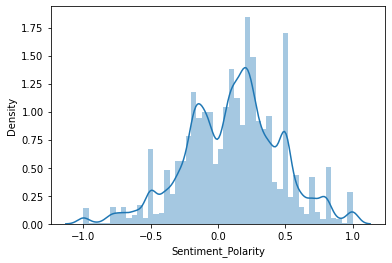

In [ ]:
sns.distplot(df_subset_Ruto['Sentiment_Polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



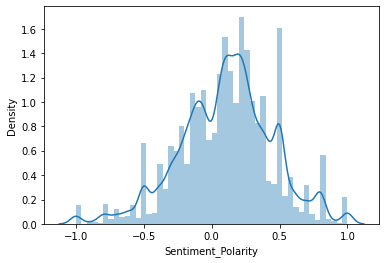

In [ ]:
sns.distplot(df_subset_Raila['Sentiment_Polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



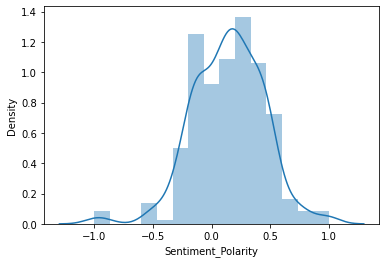

In [ ]:
sns.distplot(df_subset_mwaure['Sentiment_Polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



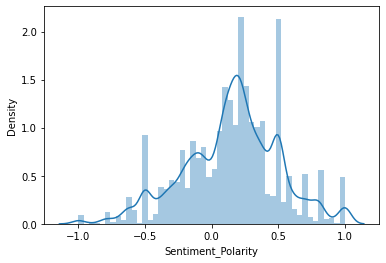

In [ ]:
sns.distplot(df_subset_Wajackoyah['Sentiment_Polarity'])

In [ ]:
count_1 = df_subset_Ruto.groupby('Expression Label').count()

print(count_1)

                     id  content  Sentiment_Polarity
Expression Label                                    
negative          12731    12731               12731
positive          22337    22337               22337


In [ ]:
count_2 = df_subset_Raila.groupby('Expression Label').count()

print(count_2)

                     id  content  Sentiment_Polarity
Expression Label                                    
negative          16417    16417               16417
positive          30145    30145               30145


In [ ]:
count_3 = df_subset_Wajackoyah.groupby('Expression Label').count()
print(count_3)

                     id  content  Sentiment_Polarity
Expression Label                                    
negative           7695     7695                7695
positive          17946    17946               17946


In [ ]:
count_4 = df_subset_mwaure.groupby('Expression Label').count()
print(count_4)

                   id  content  Sentiment_Polarity
Expression Label                                  
negative           84       84                  84
positive          185      185                 185


In [ ]:

negative_per1 = (count_1['Sentiment_Polarity'][0]/1000)*100
positive_per1 = (count_1['Sentiment_Polarity'][1]/1000)*100

negative_per2 = (count_2['Sentiment_Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment_Polarity'][1]/1000)*100

negative_per3 = (count_3['Sentiment_Polarity'][0]/1000)*100
positive_per3 = (count_3['Sentiment_Polarity'][1]/1000)*100

negative_per4 = (count_4['Sentiment_Polarity'][0]/100)*10
positive_per4 = (count_4['Sentiment_Polarity'][1]/100)*10

In [ ]:
Politicians = ['Ruto Samoei','Raila Odinga', 'Wajackoyah', 'waihiga Mwaure']
lis_pos = [positive_per1, positive_per2, positive_per3, positive_per4]
lis_neg = [negative_per1, negative_per2, negative_per3, negative_per4]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# Using Wordcloud

In [ ]:
# Removing usernames from tweets
import re
clean_ru_tweet = [re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x) for x in Ruto_reviews.content]

clean_ru_tweet


['@citizentvkenya What about that owned by the Kenyattas?? Sideshows zitaisha tu. 26 days to go. Ruto stole from nobody unlike the Kenyatta family. Taitas are apt people. They know who their enemy on the issues of land. They will invade that land eventually and Mama Ngina will do nothing.',
 '@MurangiriK1 @Jeddy77478410 @VinceChepkwony But Ruto is a known thief, liar and conman. Eugene is not a woman unless Ruto is gay.',
 '@Kenyans Day dream ruto will never beat raila in western kenya I dare say that just weeks to go prove me wrong, in sha Allah',
 '@ahmednasirlaw Uhuru should be careful. When you become king the first thing you do is to finish the king maker. If Raila wins no bush in Ichaweri will contain Uhuru. Handshake Ruto atapewa.',
 '@ahmednasirlaw You decided to vote for Ruto long time after he promised to hire you during presidential election petition. Politics is self interest',
 '@niconico_dorago よかった！ε-(´∀｀*)\nさあやかほのかで迷ってて、調べたらキラキラネームって言ってる人もいてどうしようと思ってた！',
 "@ahmednasirla

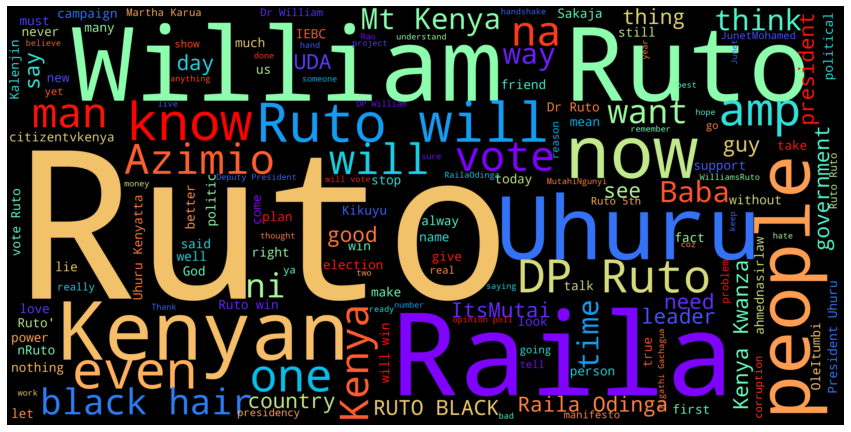

In [ ]:
# Start with one review:
text = str(clean_ru_tweet)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Removing usernames from tweets
import re
clean_ra_tweet = [re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x) for x in Raila_reviews.content]

clean_ra_tweet


['@Kenyans Day dream ruto will never beat raila in western kenya I dare say that just weeks to go prove me wrong, in sha Allah',
 'Obvious Raila wins in poll survey. But the facts remains that Railas journey to Bondo is unstoppable. Not even Uhuru will stop it. Prepare for RUTOs presidency #StateProject',
 '@ahmednasirlaw Uhuru should be careful. When you become king the first thing you do is to finish the king maker. If Raila wins no bush in Ichaweri will contain Uhuru. Handshake Ruto atapewa.',
 "@ahmednasirlaw most of them are in the assumption of office committee. Should they allow Ruto to win, and they know his foul mouth, it will be an embarrassment that will live with them for the rest of their lives. They simply can't allow Ruto to win. Loud and clear. Ruto will be the new Raila",
 '@Kenyans I thought it’s election and not a monarchy! What do you mean handover? Malize na uende tafadhali!Raila is in government now which is illegal!',
 '@Farahabat1 @AiroNickson He is the presiden

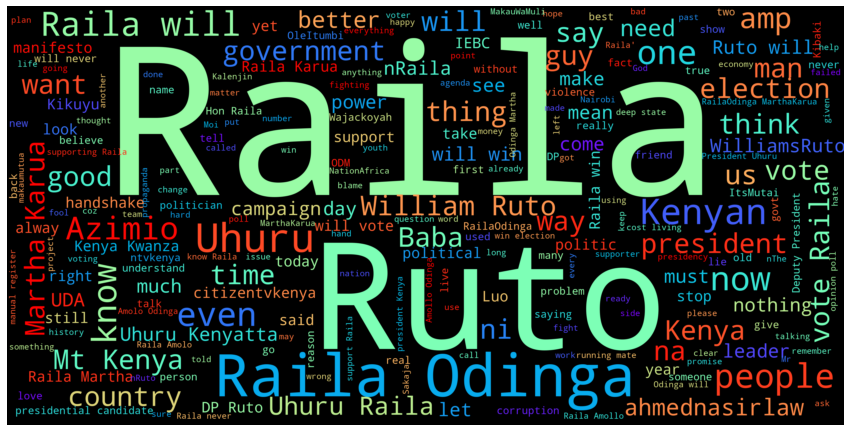

In [ ]:
# Start with one review:
text = str(clean_ra_tweet)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Removing usernames from tweets
import re
clean_wa_tweet = [re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x) for x in Waja_reviews.content]

clean_wa_tweet


['BEST ',
 '@Hon_wajackoyah_ Fizzling out like slow puncture after launching, solutions not practical, not thought through…',
 '@AfricaCheck_KE @Hon_wajackoyah_ Mnadanganywa Mchana... At least someone has said it.',
 'Biden ameita Supreme Court WAKORA...Kenya sets a precedent in key issues. We are special. Over to you Wajackoyah the Fifth @glwajackoyah ',
 'GEORGE WAJACKOYAH sets the record straight on being UHURU’s project as he fingers RAILA and RUTO - LOOK! ',
 '@Cjamehk Hahaha @Hon_wajackoyah_ uko Sawa but ain’t sure you’ll win this round',
 "@AlinurMohamed_ You are hardly sober. Keep off Wajackoyah's stuff sometimes.",
 "But Mkiwa Considerate Y'all will vote for Wajackoyah ...we are seeing Better lies than others",
 '@StandardKenya Pastor should with all due respect stick to his trade and not ride with @Hon_wajackoyah_ to gain popularity by weaponizing bangi!',
 '@Edwinmbosso51 Do you prezo bitter kama Dp.Akuna jamaa roho safi kama uhuru. Forgiveness is everything, lakini mahali R

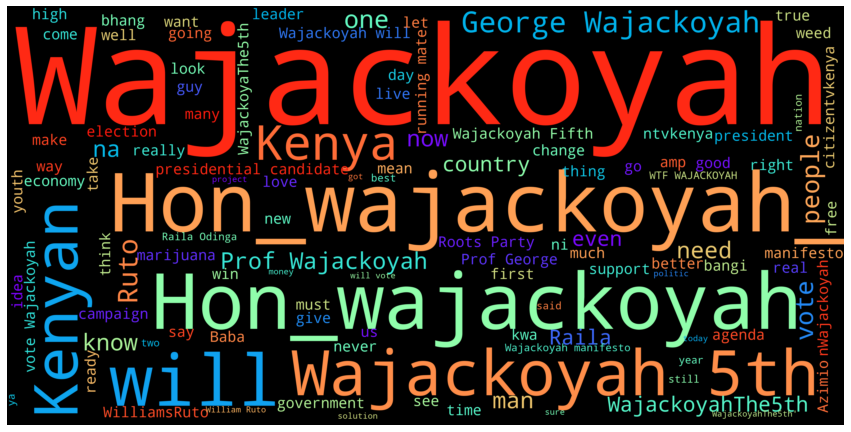

In [ ]:
# Start with one review:
text = str(clean_wa_tweet)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Removing usernames from tweets
import re
clean_mw_tweet = [re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x) for x in Mwaure_reviews.content]

clean_mw_tweet


['David Mwaure Laments Over Failure Of Provision Of A Security During Detail On His Campaign\n@K24Tv \n\nWATCH VIDEO:  ',
 'Tom Wolf explained that the appearance and rise of either George Wajackoyah of Roots Party and David Mwaure of Agano Party is sufficient to raise the possibility that neither Odinga nor Ruto will secure a strong win in the first round of voting.\n\n',
 'I am praying that when we win and you join my government that you will one day become a bishop as well - David Mwaure to George Wajackoyah ',
 'I am praying that when we win and you join my government that you will one day become a bishop as well - David Mwaure to George Wajackoyah ',
 'As of 2022, he is pursuing a PhD in leadership.\nManifesto\n1. Should he and his running mate, Ruth Mutua, ascend to power in August, David Mwaure has pledged to increase revenue allocation to counties to 40%, designate 10% of the 40% to go directly to the Village councils.',
 'he joined the University of Nairobi, where he studied l

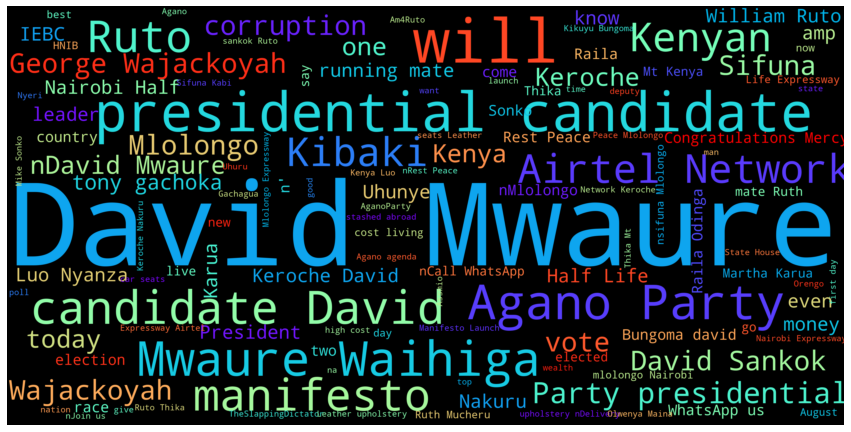

In [ ]:
# Start with one review:
text = str(clean_mw_tweet)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analysis Using their Negative & Positive responses

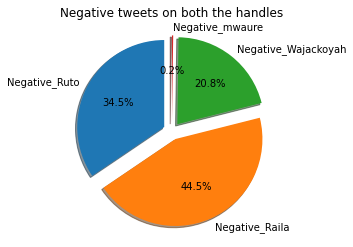

In [ ]:
labels =  ['Negative_Ruto', 'Negative_Raila','Negative_Wajackoyah','Negative_mwaure'] 
sizes = lis_neg
explode = (0.1, 0.1,0.1,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Negative tweets on both the handles')
plt.show()

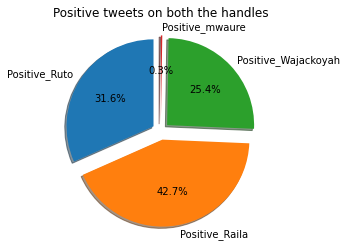

In [ ]:
labels =  ['Positive_Ruto', 'Positive_Raila','Positive_Wajackoyah','Positive_mwaure'] 
sizes = lis_pos
explode = (0.1, 0.1,0.1,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Positive tweets on both the handles')
plt.show()